# Exploratory Data Analysis

Context: 
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient  

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# matplotlib font
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
# load the dataset
data = pd.read_csv('data/dataset_original.csv')

In [3]:
# sneak peak into the data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Dimensions of the dataset
data.shape

(5110, 12)

We have 5110 entries of patients with 12 attributes. One of them being the target attribute --> **Stroke**

In [5]:
# Data types of various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Object data types are catagorical, whereas the rest are numerical. This helps us identify what plots to use while visualizing this data

## Numeric Features
Numeric (continuous) features, the values are grouped in ranges, also known as bins

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


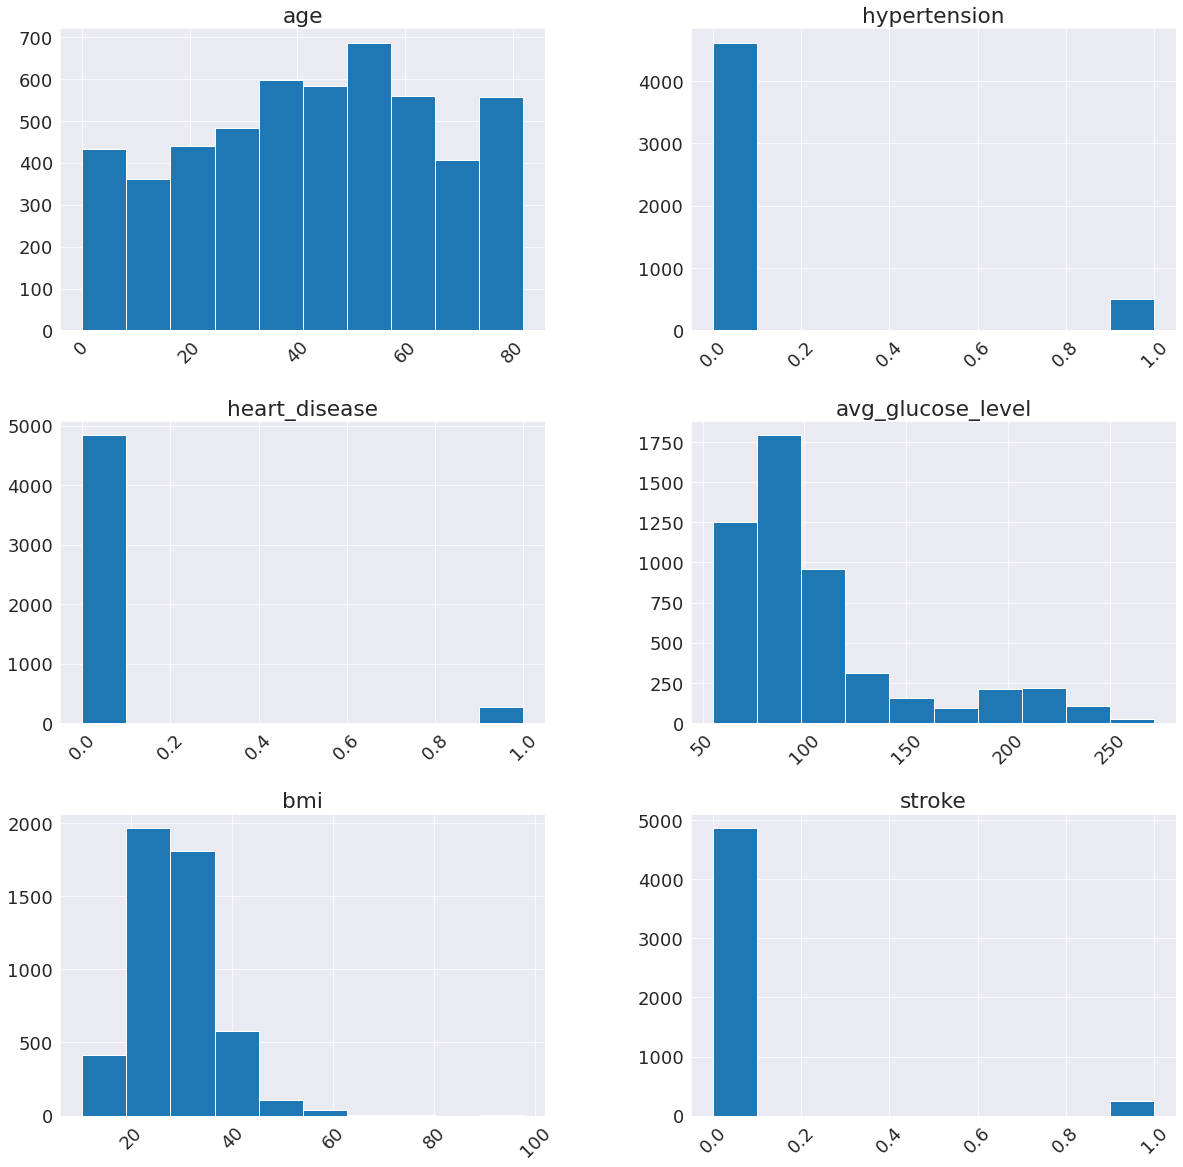

In [6]:
data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].hist(figsize=(20,20),xrot=45)
# plt.savefig('numeric_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

- id are unique identifiers to all patients
- Age is represented quite evenly, though most data lies between ages 20-60
- Hypertension has a huge data imbalance with most values being 0
- Heart Disease has a huge data imbalance with most values being 1
- Stroke is the target variable. It has imbalance since most values are negative or 0

In [7]:
# Numeric features summary statistics
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- bmi has some missing or NAN values since its count is lower than the number of entries
- there seems to be some outliers in the bmi data
- Otherwise the data seems consistant, the mean and median (50th percentile) values are close enough and there arent any outliers

## Categorical features
Categorical features are columns that contain only a handful of unique values, and therefore each value belongs to a particular class or group.

In [8]:
# Categorica features summary statistics
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


- There seems to be no NAN or missing values

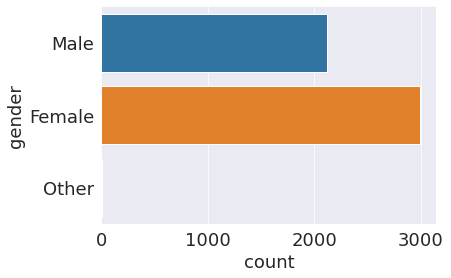

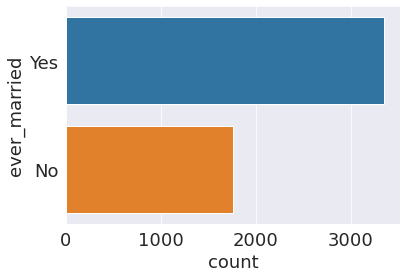

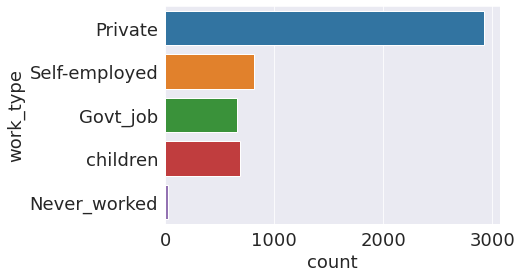

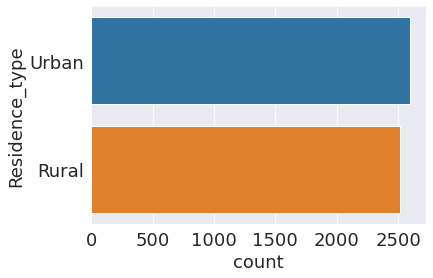

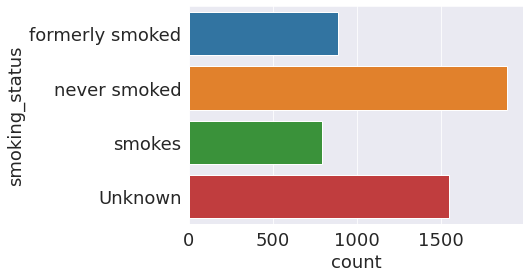

In [9]:
# Plotting catagorical features

for col in data.select_dtypes(include='object'):
    sns.countplot(y=col, data=data)
#     plt.savefig(f'categorical_feature_{col}', dpi=300, bbox_inches='tight')
    
    
    plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


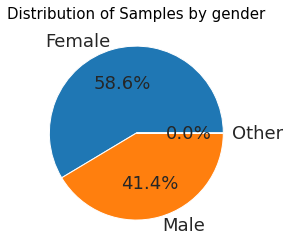

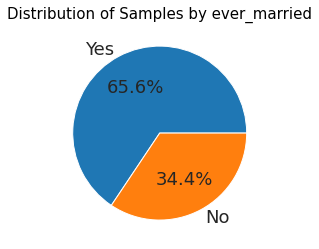

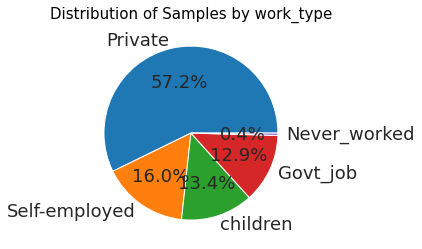

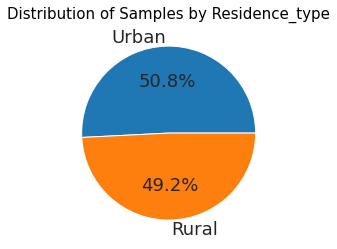

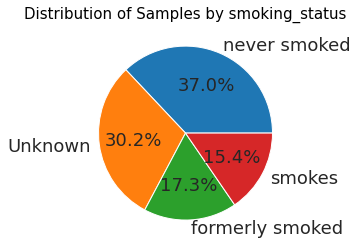

In [10]:
# Plotting catagorical features visualizing the percentage of each category in every feature
for col in data.select_dtypes(include='object'):
    
    labels = data[col].value_counts().index
    sizes = data[col].value_counts().values
    title = f'Distribution of Samples by {col}'
    
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(title,color = 'black',fontsize = 15)

- There are a few more females than males in our dataset
- There are almost twice the amount of married people than unmarried people
- Most of the patients worked in private sector, with almost none being unemployed
- We have an equal number of patients living in urban and rural areas
- We have some patients with unknown smoking status, thus smoking status might not be a great feature

## Target against Numeric Features
Here, we will separate the data by the target feature and observe how numeric features are distributed among those who had a stroke (stroke = 1) and those who did not have a stroke (stroke = 0)

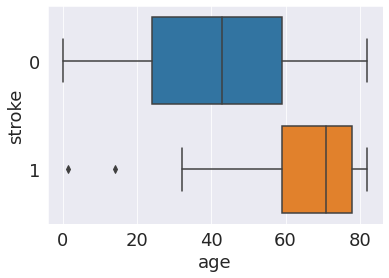

In [11]:
# boxplot for age
sns.boxplot(y = data['stroke'].astype('category'), x = 'age', data=data, orient='h')
# plt.savefig('stroke_against_age.png', dpi=300, bbox_inches='tight')
plt.show()

- we can clearly see that stroke is more prevalent at older ages

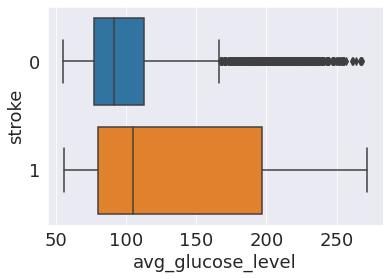

In [12]:
# boxplot for avg_glucose_level
sns.boxplot(y = data['stroke'].astype('category'), x = 'avg_glucose_level', data=data, orient='h')
# plt.savefig('stroke_against_avg_glucose_level.png', dpi=300, bbox_inches='tight')
plt.show()

- we can see that patients with a higher average glucose level were more susceptible to stroke

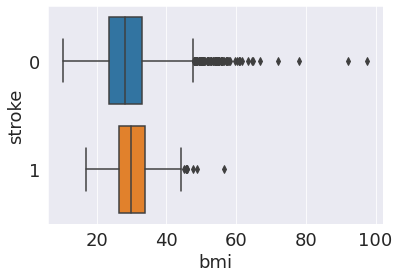

In [13]:
# boxplot for bmi
sns.boxplot(y = data['stroke'].astype('category'), x = 'bmi', data=data, orient='h')
# plt.savefig('stroke_against_bmi.png', dpi=300, bbox_inches='tight')
plt.show()

- bmi values seem to be close, but slightly higher bmi suggest more risk of stroke

## Target against Catagorical Features
We will see how target variable is related to each catagorical feature

In [14]:
for col in data.select_dtypes(include='object'):
#     display(pd.crosstab(data['stroke'], data[col], normalize='index')) # for percentage
    display(pd.crosstab(data['stroke'], data[col]))

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


ever_married,No,Yes
stroke,,
0,1728,3133
1,29,220


work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624,22,2776,754,685
1,33,0,149,65,2


Residence_type,Rural,Urban
stroke,,
0,2400,2461
1,114,135


smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


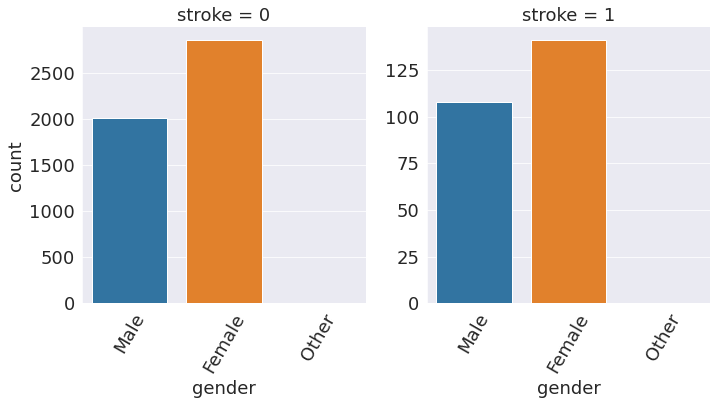

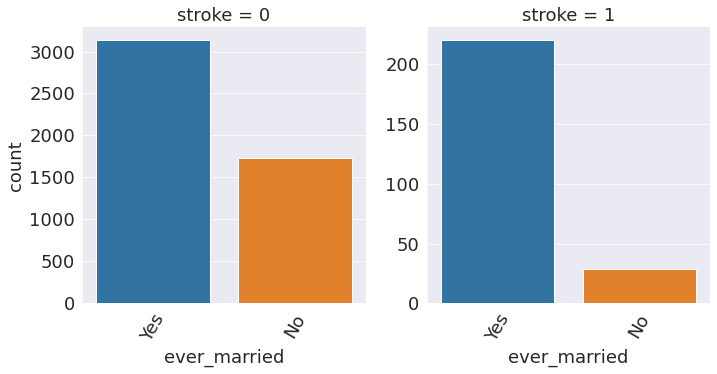

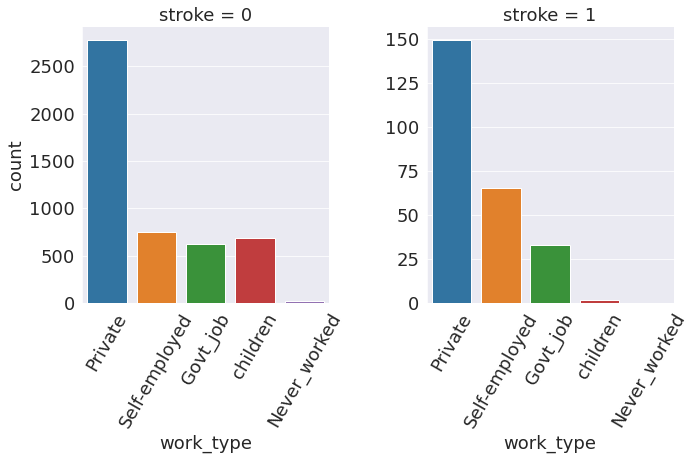

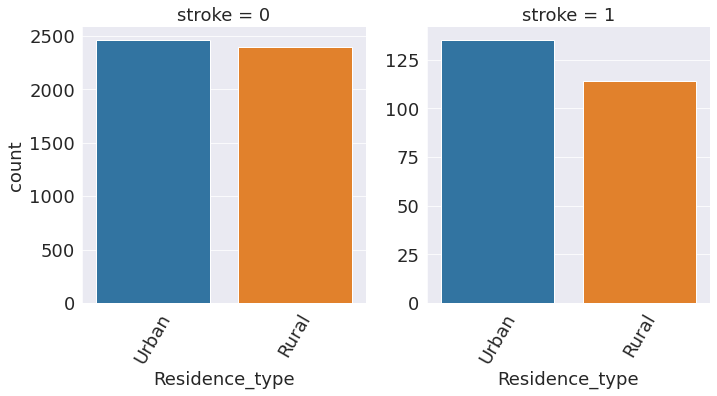

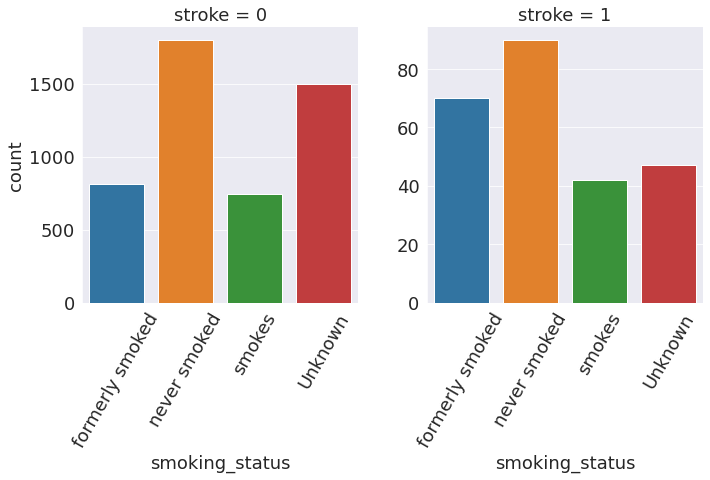

In [15]:
for col in data.select_dtypes(include='object'):
    g = sns.catplot(x = col, kind='count', col = 'stroke', data=data, sharey=False)
    g.set_xticklabels(rotation=60)
#     plt.savefig(f'targest_against_{col}.png', dpi=300, bbox_inches='tight')

- The percentage of data per each class with no stroke seems consistant with the percentage of data per each class with a stroke but for children and never_workes in the work_type feature, there is a dramatic decrease, indicating most children and patients who never worked have the least chance of getting a stroke

## Group numeric features by categorical features

We will see how catagorical features are related to numeric features.

In [16]:
for col in data.select_dtypes(include='object'):
    display(data.groupby(col)[['id', 'age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']].mean())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
gender,,,,,,
Female,36479.685037,43.757395,0.092184,0.037742,104.057809,29.065758
Male,36562.541371,42.483385,0.104965,0.077069,109.088520,28.647936
Other,56156.000000,26.000000,0.000000,0.000000,143.330000,22.400000


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
ever_married,,,,,,
No,36117.673307,22.014229,0.030165,0.018213,96.44815,25.214721
Yes,36727.514465,54.342082,0.132717,0.072771,111.23031,30.850749


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
work_type,,,,,,
Govt_job,36516.936073,50.879756,0.111111,0.054795,107.779772,30.522063
Never_worked,38274.409091,16.181818,0.000000,0.000000,96.042727,25.545455
Private,36951.227009,45.503932,0.096068,0.054017,106.796844,30.304625
Self-employed,35551.288156,60.201465,0.175824,0.098901,112.645446,30.211871
children,35769.432314,6.841339,0.000000,0.001456,94.400277,20.038003


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
Residence_type,,,,,,
Rural,36547.998011,42.900811,0.099841,0.053302,106.375235,28.894212
Urban,36488.613636,43.542126,0.095146,0.054700,105.927307,28.892289


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
smoking_status,,,,,,
Unknown,35899.042098,30.229922,0.033679,0.031088,99.601541,25.666352
formerly smoked,36878.981921,54.929944,0.135593,0.087006,112.886079,30.747192
never smoked,36833.141649,46.744715,0.122622,0.047569,107.558092,29.982559
smokes,36567.533587,47.096324,0.119138,0.077313,108.017440,30.543555


## Interactions between Numeric Features and other Numeric Features

A correlation matrix is a table used to summarize the associations between numeric features. The same features are shown in the rows and columns, and each cell holds the correlation coefficient of two features. The correlation coefficient is a measure of the strength of the relationship between the two variables and can take any value between -1 and 1. The correlation of a feature with itself is 1.

In [17]:
corr = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


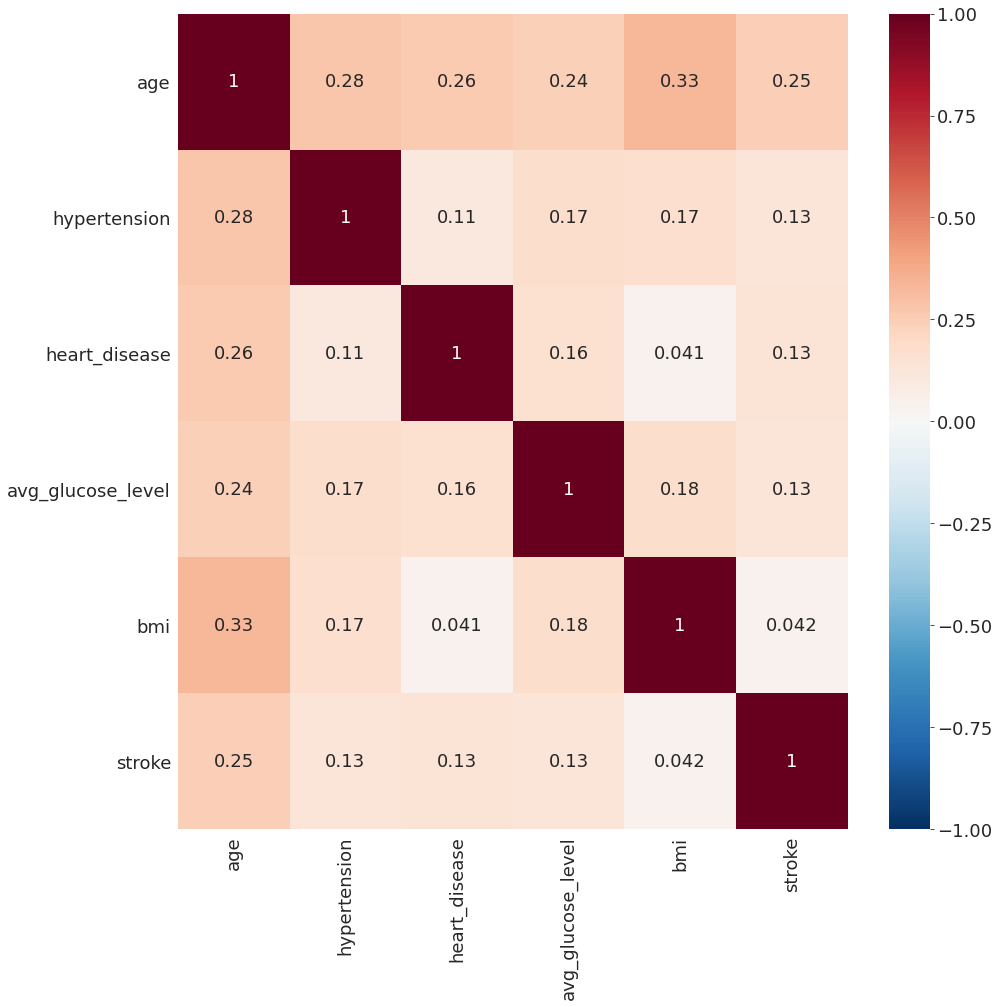

In [18]:
# Visualization using seaborn heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
# plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

- id has the weakest correlation with any other feature, it is clear id number makes so affect on the outcome
- We also see a weak positive correlation between bmi and age
- There is not a single negative correlation here